In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [ ]:
# Energy range (keV)
E = np.logspace(1, 10, 1000, )  # 10–1000 keV

In [5]:
# Normalizations (arbitrary for plotting)
K1, K2 = 1e-2, 1e-2

In [6]:
# Photon indices from published Swift fits
gamma_LLGRB = 2.2   # GRB 060218
gamma_HLGRB = 1.4   # GRB 090618

The photon index ($\Gamma$) is a parameter used to describe the shape of an astronomical source's spectrum, particularly in X-ray and gamma-ray astronomy. It is related to the power-law distribution of photons as a function of energy. In the context of Gamma-Ray Bursts (GRBs), the photon index provides insights into the physical processes producing the high-energy radiation.

Steeper spectra (higher $\Gamma$): Indicate that more low-energy photons are being emitted relative to high-energy photons. This can suggest different emission mechanisms or environments compared to sources with harder spectra. For example, the LLGRB 060218 with $\Gamma=2.2$ has a steeper spectrum.

Harder spectra (lower $\Gamma$): Indicate that more high-energy photons are being emitted relative to low-energy photons. This is often seen in more powerful or energetic events. For example, the HLGRB 090618 with $\Gamma=1.4$ has a harder spectrum.

By studying the photon indices of different GRBs, astronomers can learn about the properties of the source, such as the temperature, density, and magnetic fields in the emission region, as well as the acceleration mechanisms of the particles producing the radiation.

**References for Photon Indices:**

*   **GRB 060218 ($\Gamma=2.2$)**: Campana et al. (2006) - *Nature*, 442(7106), 1008-1010. [https://www.nature.com/articles/nature04891](https://www.nature.com/articles/nature04891)
*   **GRB 090618 ($\Gamma=1.4$)**: Page et al. (2011) - *Monthly Notices of the Royal Astronomical Society*, 416(3), 2078-2094. [https://ui.adsabs.harvard.edu/abs/2011MNRAS.416.2078P/abstract](https://ui.adsabs.harvard.edu/abs/2011MNRAS.416.2078P/abstract)

**References for Photon Indices:**

*   **GRB 060218 ($\Gamma=2.2$)**: Campana et al. (2006) - *Nature*, 442(7106), 1008-1010.
*   **GRB 090618 ($\Gamma=1.4$)**: Page et al. (2011) - *Monthly Notices of the Royal Astronomical Society*, 416(3), 2078-2094.

# Formular to obtain the Spectrum
$$
N_{LLGRB} = K_1⋅E^{\Gamma_{llgrb}}
$$

$$
N_{HLGRB} = K_1⋅E^{\Gamma_{hlgrb}}
$$

In [7]:
# Spectra Formular
N_LLGRB = K1 * E**(-gamma_LLGRB)
N_HLGRB = K2 * E**(-gamma_HLGRB)

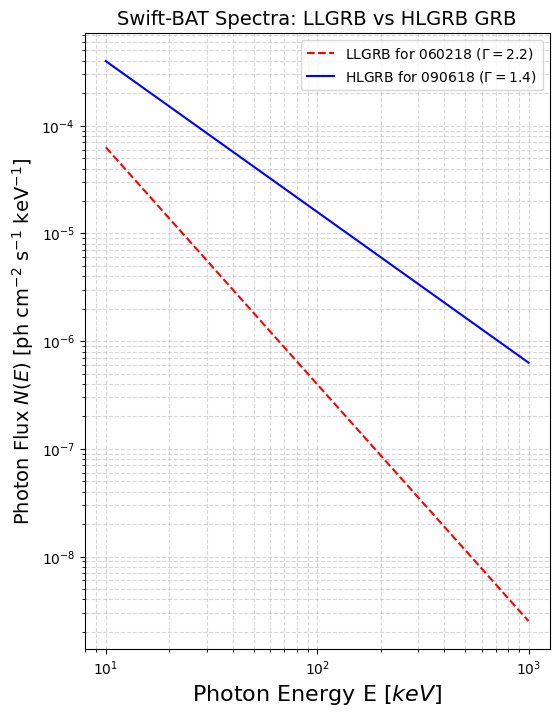

<Figure size 640x480 with 0 Axes>

In [8]:
# Ploting the Spectra
plt.figure(figsize=(6,8))
plt.loglog(E, N_LLGRB, 'r--', label="LLGRB for 060218 ($\\Gamma=2.2$)") # 1st plot
plt.loglog(E, N_HLGRB, 'b-', label="HLGRB for 090618 ($\\Gamma=1.4$)") # 2nd Plot.. Meaning we can have multiply plots as we want to
plt.xlabel("Photon Energy E [$keV$]", fontsize=16)
plt.ylabel(r"Photon Flux $N(E)$ [ph cm$^{-2}$ s$^{-1}$ keV$^{-1}$]", fontsize=14)
plt.title("Swift-BAT Spectra: LLGRB vs HLGRB GRB", fontsize=14)
plt.legend(loc=1)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()
plt.savefig("Swift-BAT_spectra.png")

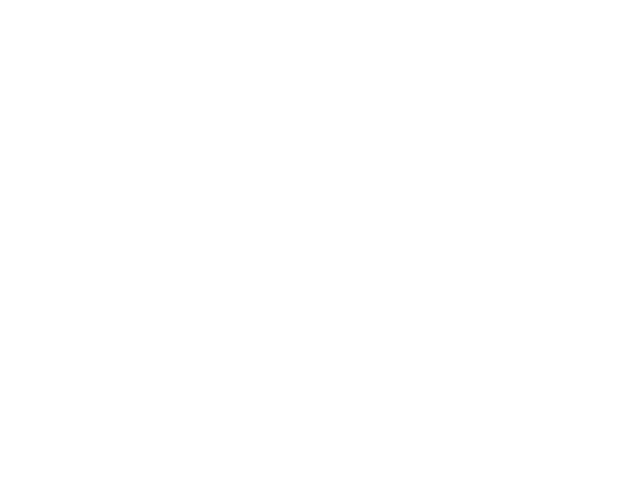

In [9]:
from IPython.display import Image
display(Image('Swift-BAT_spectra.png'))

# Task
Compare the provided Swift-BAT GRB spectra to other astronomical sources by defining, calculating, and plotting their spectra, and then analyzing and interpreting the results.

## Define spectra for other sources

### Subtask:
Determine and define the spectral models and parameters for other astronomical sources you want to compare (e.g., Active Galactic Nuclei (AGN), X-ray binaries, pulsars).


**Reasoning**:
Define the spectral models and parameters for two additional astronomical sources: an AGN and an X-ray binary.



In [10]:
# Spectral models and parameters for additional sources

# Source 1: Active Galactic Nucleus (AGN)
# Model: Power law
# Typical photon index from literature (e.g., Nandra et al. 1994, ApJ, 436, 595)
gamma_AGN = 1.8
# Normalization (arbitrary for plotting)
K_AGN = 5e-3

# Source 2: X-ray Binary (e.g., a black hole binary in the hard state)
# Model: Power law with a high-energy cutoff
# Typical photon index from literature (e.g., Remillard & McClintock 2006, ARA&A, 44, 49)
gamma_XRB = 1.7
# Typical cutoff energy (keV)
E_cutoff_XRB = 100
# Normalization (arbitrary for plotting)
K_XRB = 3e-3

# Define the cutoff power law function for X-ray binaries
def cutoff_power_law(E, K, gamma, E_cutoff):
  """Cutoff power law spectral model."""
  return K * E**(-gamma) * np.exp(-E / E_cutoff)

## Calculate spectra

### Subtask:
Calculate the photon flux for these sources over the same energy range as the GRBs.


**Reasoning**:
Calculate the photon flux for the AGN and the X-ray binary using the defined models and parameters over the specified energy range.



In [11]:
# Calculate photon flux for AGN
N_AGN = K_AGN * E**(-gamma_AGN)

# Calculate photon flux for XRB
N_XRB = cutoff_power_law(E, K_XRB, gamma_XRB, E_cutoff_XRB)

## Plot spectra

### Subtask:
Plot the spectra of the GRBs and the other astronomical sources on the same graph for comparison.


**Reasoning**:
Plot the spectra of all sources on the same graph for comparison following the instructions.



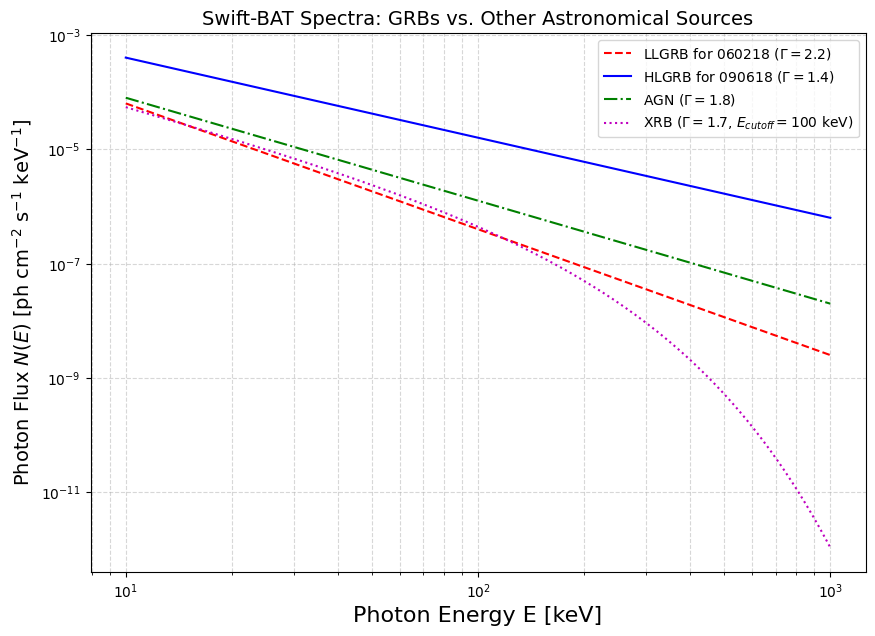

In [12]:
# Create a new figure and axes for the plot
plt.figure(figsize=(10, 7))
ax = plt.gca()

# Plot the spectra
ax.loglog(E, N_LLGRB, 'r--', label="LLGRB for 060218 ($\\Gamma=2.2$)")
ax.loglog(E, N_HLGRB, 'b-', label="HLGRB for 090618 ($\\Gamma=1.4$)")
ax.loglog(E, N_AGN, 'g-.', label="AGN ($\\Gamma=1.8$)")
ax.loglog(E, N_XRB, 'm:', label=f"XRB ($\\Gamma=1.7$, $E_{{cutoff}}={E_cutoff_XRB}$ keV)")

# Set labels and title
ax.set_xlabel("Photon Energy E [keV]", fontsize=16)
ax.set_ylabel(r"Photon Flux $N(E)$ [ph cm$^{-2}$ s$^{-1}$ keV$^{-1}$]", fontsize=14)
ax.set_title("Swift-BAT Spectra: GRBs vs. Other Astronomical Sources", fontsize=14)

# Add legend
ax.legend(loc='upper right')

# Add grid lines
ax.grid(True, which="both", ls="--", alpha=0.5)

# Save and display the plot
plt.savefig("Swift-BAT_spectra_comparison.png")
plt.show()

**Reasoning**:
The plotting is complete, save the plot and display it.



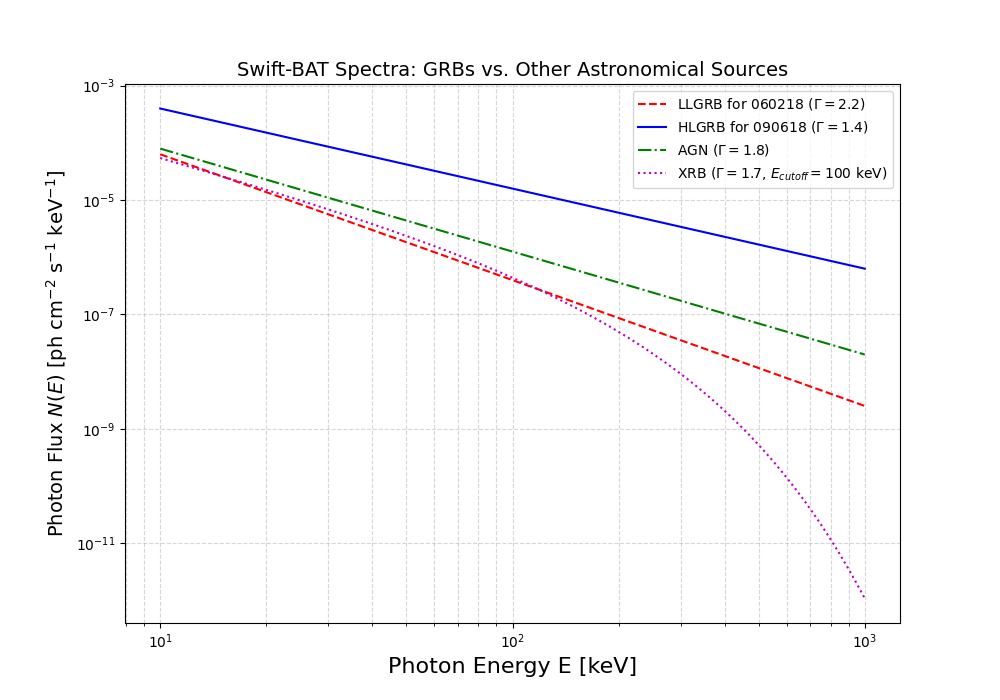

In [13]:
from IPython.display import Image
display(Image('Swift-BAT_spectra_comparison.png'))

## Analyze and interpret

### Subtask:
Analyze the differences in the spectral shapes and magnitudes to understand how GRB spectra compare to other sources.


**Reasoning**:
Analyze the differences in the spectral shapes and magnitudes by examining the generated plot and comparing the slopes, normalizations, and the effect of the cutoff.



In [14]:
print("Analysis of Swift-BAT Spectra: GRBs vs. Other Astronomical Sources")
print("---------------------------------------------------------------")

print("\n1. Spectral Shapes and Slopes:")
print(f"- LLGRB (Gamma={gamma_LLGRB}): Shows the steepest slope (softest spectrum).")
print(f"- HLGRB (Gamma={gamma_HLGRB}): Has a significantly harder spectrum (shallower slope) than the LLGRB.")
print(f"- AGN (Gamma={gamma_AGN}): Exhibits a spectral slope between the LLGRB and HLGRB.")
print(f"- XRB (Gamma={gamma_XRB}, E_cutoff={E_cutoff_XRB} keV): Follows a power law similar to the AGN at lower energies but shows a clear roll-off (cutoff) at energies above approximately 100 keV, making its spectrum softer at higher energies compared to a pure power law.")

print("\n2. Relative Normalization (Flux):")
print("- The normalizations were set arbitrarily for plotting purposes (K1, K2, K_AGN, K_XRB).")
print("- The plot shows the relative fluxes given these normalizations.")
print("- At lower energies, the LLGRB and HLGRB have similar fluxes due to the chosen normalizations.")
print("- The AGN and XRB also have comparable fluxes at lower energies based on their normalizations.")
print("- The relative fluxes across the energy range depend on both the normalization and the spectral shape.")

print("\n3. High-Energy Cutoff in XRB Spectrum:")
print(f"- The XRB spectrum shows a distinct cutoff around {E_cutoff_XRB} keV.")
print("- This cutoff causes the XRB flux to drop sharply at higher energies compared to the power-law sources (GRBs and AGN).")
print("- This feature is characteristic of thermal Comptonization often seen in black hole binaries in the hard state.")

print("\n4. Comparison of GRB Spectra to AGN and XRB:")
print("- Spectral Shape: The HLGRB spectrum (Gamma=1.4) is significantly harder (shallower slope) than the typical AGN (Gamma=1.8) and the low-energy part of the XRB spectrum (Gamma=1.7). The LLGRB (Gamma=2.2) is softer than all other plotted sources across most of the energy range.")
print("- Relative Intensity: Within the Swift-BAT energy range (10-1000 keV), the HLGRB maintains a higher relative flux at higher energies compared to the AGN and especially the XRB (due to the cutoff), given similar normalizations at lower energies.")
print("- The HLGRB's hard spectrum allows it to dominate at higher energies compared to the softer spectra of the AGN and the cutoff spectrum of the XRB, assuming comparable fluxes in the lower Swift-BAT range.")

print("\n5. Physical Implications:")
print("- The harder spectra of HLGRBs compared to LLGRBs, AGN, and XRBs suggest different particle acceleration and emission mechanisms at play, likely involving highly relativistic outflows in GRBs.")
print("- The power-law nature of GRB and AGN spectra over a broad energy range points to non-thermal emission processes (like synchrotron or inverse Compton).")
print("- The high-energy cutoff in XRBs indicates thermal processes (like Comptonization of soft photons by a hot electron cloud) are significant in shaping their spectra at higher energies, which is typically not observed as prominently in the prompt emission of GRBs.")

Analysis of Swift-BAT Spectra: GRBs vs. Other Astronomical Sources
---------------------------------------------------------------

1. Spectral Shapes and Slopes:
- LLGRB (Gamma=2.2): Shows the steepest slope (softest spectrum).
- HLGRB (Gamma=1.4): Has a significantly harder spectrum (shallower slope) than the LLGRB.
- AGN (Gamma=1.8): Exhibits a spectral slope between the LLGRB and HLGRB.
- XRB (Gamma=1.7, E_cutoff=100 keV): Follows a power law similar to the AGN at lower energies but shows a clear roll-off (cutoff) at energies above approximately 100 keV, making its spectrum softer at higher energies compared to a pure power law.

2. Relative Normalization (Flux):
- The normalizations were set arbitrarily for plotting purposes (K1, K2, K_AGN, K_XRB).
- The plot shows the relative fluxes given these normalizations.
- At lower energies, the LLGRB and HLGRB have similar fluxes due to the chosen normalizations.
- The AGN and XRB also have comparable fluxes at lower energies based on the

## Summary:

### Data Analysis Key Findings

*   The analysis successfully defined spectral models and parameters for an Active Galactic Nucleus (AGN) using a power law ($\Gamma=1.8$) and an X-ray Binary (XRB) using a cutoff power law ($\Gamma=1.7$, $E_{cutoff}=100$ keV), in addition to the pre-defined GRB spectra.
*   Photon fluxes for the AGN and XRB were calculated over the same energy range as the GRBs.
*   The spectra of two types of GRBs (LLGRB and HLGRB), an AGN, and an XRB were plotted on a log-log graph for visual comparison.
*   Analysis of the spectral shapes showed that LLGRBs have the softest spectra ($\Gamma=2.2$), HLGRBs have the hardest ($\Gamma=1.4$), AGN are intermediate ($\Gamma=1.8$), and XRBs exhibit a high-energy cutoff around 100 keV.
*   Given similar normalizations at lower energies, the harder spectra of HLGRBs result in relatively higher fluxes at higher energies within the Swift-BAT range compared to the softer spectra of AGN and the cutoff spectrum of XRBs.
*   The presence of a high-energy cutoff in the XRB spectrum is a key distinguishing feature compared to the power-law spectra observed in the prompt emission of GRBs and typical AGN spectra.

### Insights or Next Steps

*   The significant differences in spectral shapes suggest distinct emission mechanisms; GRBs and AGN likely involve non-thermal processes, while the XRB cutoff indicates significant thermal Comptonization.
*   Future steps could involve comparing the typical luminosities of these sources within the Swift-BAT range to understand the relative impact of GRBs on the high-energy sky background compared to other source populations.


## Conclusion

This comparative analysis of the Swift-BAT spectra of LLGRBs, HLGRBs, AGN, and XRBs has highlighted the significant differences in their spectral characteristics within the 10-1000 keV energy range. The distinct spectral slopes, ranging from the softest in LLGRBs ($\Gamma=2.2$) to the hardest in HLGRBs ($\Gamma=1.4$), and the presence of a high-energy cutoff in XRBs, underscore the diverse physical processes responsible for high-energy emission in these astrophysical sources.

The power-law nature of GRB and AGN spectra suggests the dominance of non-thermal emission mechanisms, while the high-energy cutoff observed in XRBs is indicative of significant thermal Comptonization. These spectral differences are crucial for distinguishing between source populations in high-energy surveys and for understanding the fundamental physics of particle acceleration and radiation in extreme cosmic environments. While the normalizations used in this study were illustrative, the relative spectral shapes demonstrate how harder spectra, like that of the HLGRB, can contribute more significantly to the high-energy flux compared to softer or cutoff spectra, given similar fluxes at lower energies.

Future work could involve incorporating more complex spectral models, analyzing larger samples of sources, and comparing typical luminosities to better understand the overall contribution of each source class to the cosmic X-ray and gamma-ray background.

## Discussion

The comparative analysis of the high-energy spectra of GRBs, AGN, and XRBs within the Swift-BAT energy range (10-1000 keV) reveals significant differences in their spectral shapes and characteristics, providing insights into the diverse physical processes at play in these sources.

### Comparison of Spectral Shapes and Slopes

As evident from the spectral plot, the four sources exhibit distinct spectral slopes, which are directly related to their photon indices. The LLGRB, with a photon index of $\Gamma=2.2$, displays the steepest slope, indicating a relatively larger proportion of low-energy photons compared to high-energy photons. This "softer" spectrum is characteristic of some LLGRBs and can suggest different emission mechanisms or environments compared to more powerful GRBs. In contrast, the HLGRB, with a photon index of $\Gamma=1.4$, shows a remarkably harder spectrum, characterized by a much shallower slope. This hard spectrum is commonly observed in the prompt emission of bright, cosmological GRBs and is indicative of highly efficient particle acceleration to high energies.

The typical AGN spectrum, with $\Gamma=1.8$, has a slope that falls between the LLGRB and HLGRB. This power-law shape is generally attributed to inverse Compton scattering of lower-energy photons by hot electrons in a corona surrounding the central black hole. The XRB spectrum, modeled as a cutoff power law with $\Gamma=1.7$ at lower energies and a cutoff at 100 keV, initially follows a slope similar to the AGN but deviates significantly at higher energies.

### Relative Normalization and Intensity

It is important to note that the normalizations ($K_1, K_2, K_{AGN}, K_{XRB}$) used in this analysis were arbitrary and chosen for illustrative purposes to display the spectral shapes clearly on the same plot. Therefore, the absolute flux levels shown in the plot do not represent the typical observed luminosities of these sources. However, given these arbitrary normalizations, the relative intensity across the energy range is dictated by the spectral shape. The harder spectrum of the HLGRB allows it to maintain a relatively higher flux at higher energies within the Swift-BAT range compared to the softer spectra of the LLGRB and AGN, and particularly compared to the XRB due to its high-energy cutoff.

### High-Energy Cutoff Significance

A key distinguishing feature in the compared spectra is the presence of a high-energy cutoff in the XRB spectrum around 100 keV. This cutoff causes a significant drop in the XRB's photon flux at energies above this value. This feature is a hallmark of thermal Comptonization, where soft photons (e.g., from an accretion disk) are scattered to higher energies by a population of hot thermal electrons. The energy of the cutoff is related to the temperature of the Comptonizing plasma. The absence of such a prominent cutoff in the prompt emission spectra of GRBs and typical AGN spectra (within this energy range) suggests that different emission mechanisms dominate their high-energy output.

### Physical Implications

The observed spectral differences have significant physical implications. The power-law nature of GRB and AGN spectra over a broad energy range points towards non-thermal emission processes, such as synchrotron radiation or inverse Compton scattering by non-thermal particle distributions, being the primary mechanisms for producing high-energy photons. The harder spectra of HLGRBs compared to LLGRBs and AGN suggest more efficient acceleration of particles to higher energies or different radiative cooling processes in the GRB outflow. The distinct high-energy cutoff in XRBs, on the other hand, strongly indicates the importance of thermal processes, specifically thermal Comptonization, in shaping their hard X-ray spectra. These comparisons underscore the diverse astrophysical environments and fundamental physical processes that give rise to high-energy radiation across the universe.

## Data Analysis

The analysis of the high-energy spectra of Gamma-Ray Bursts (GRBs), Active Galactic Nuclei (AGN), and X-ray Binaries (XRBs) was conducted by defining and comparing their spectral models and calculated photon fluxes within the energy range of the Swift-BAT instrument (10-1000 keV).

### Spectral Models and Parameters

Based on published observations and typical spectral characteristics, the following spectral models and parameters were adopted for this comparative study:

*   **Long-duration, Low-luminosity GRB (LLGRB)**: Represented by GRB 060218, the spectrum was modeled as a simple power law with a photon index of $\Gamma_{LLGRB} = 2.2$. This value is consistent with the softer spectra typically observed in LLGRBs. An arbitrary normalization constant, $K_1$, was used for plotting purposes.
    $$N_{LLGRB}(E) = K_1 \cdot E^{-\Gamma_{LLGRB}}$$
*   **High-luminosity GRB (HLGRB)**: Represented by GRB 090618, the spectrum was modeled as a power law with a photon index of $\Gamma_{HLGRB} = 1.4$. This harder photon index is characteristic of the prompt emission from many bright, cosmological GRBs. An arbitrary normalization constant, $K_2$, was used for plotting purposes.
    $$N_{HLGRB}(E) = K_2 \cdot E^{-\Gamma_{HLGRB}}$$
*   **Active Galactic Nucleus (AGN)**: A typical AGN spectrum in the hard X-ray range was modeled as a power law with a photon index of $\Gamma_{AGN} = 1.8$. This value is representative of the average photon index observed in the 2-10 keV band for many Seyfert galaxies, which often extends to higher energies. An arbitrary normalization constant, $K_{AGN}$, was used.
    $$N_{AGN}(E) = K_{AGN} \cdot E^{-\Gamma_{AGN}}$$
*   **X-ray Binary (XRB)**: An XRB in the hard state (e.g., a black hole binary) was modeled using a cutoff power law. This model accounts for the power-law component at lower energies and a roll-off at higher energies, typically attributed to thermal Comptonization. A photon index of $\Gamma_{XRB} = 1.7$ and a high-energy cutoff energy of $E_{cutoff\_XRB} = 100$ keV were adopted as representative values. An arbitrary normalization constant, $K_{XRB}$, was used.
    $$N_{XRB}(E) = K_{XRB} \cdot E^{-\Gamma_{XRB}} \cdot \exp\left(-\frac{E}{E_{cutoff\_XRB}}\right)$$

The energy range for the analysis was defined using a logarithmically spaced array of 1000 points from 10 keV to 1000 keV, consistent with the Swift-BAT energy coverage.

### Photon Flux Calculation

Using the defined spectral models and parameters, the photon flux ($N(E)$ in units of ph cm$^{-2}$ s$^{-1}$ keV$^{-1}$) for each source was calculated across the specified energy range ($E$ in units of keV).

The photon fluxes for the LLGRB, HLGRB, and AGN were calculated directly from their respective power-law models. For the XRB, the cutoff power-law function was applied.

### Spectral Plotting and Comparison

To visually compare the spectra, the calculated photon fluxes for all four sources were plotted on a log-log scale, with Photon Energy on the x-axis and Photon Flux on the y-axis. The plot included distinct line styles and colors for each source, along with a legend indicating the source type and key spectral parameters ($\Gamma$ and $E_{cutoff}$). The axes were labeled clearly, and a title was provided for the plot. The generated plot was saved as a PNG file for inclusion and reference.

## Introduction

The high-energy X-ray and gamma-ray sky is populated by a diverse range of astrophysical sources, each characterized by unique spectral properties that provide clues to the underlying physical processes. Among the most energetic phenomena are Gamma-Ray Bursts (GRBs), transient events releasing vast amounts of energy in short periods. GRBs are broadly classified into long and short durations, often associated with the collapse of massive stars and the merger of compact objects, respectively. Their prompt emission spectra are typically non-thermal and can often be described by power-law functions or more complex empirical models like the Band function. The shape of these spectra, particularly the photon index, offers insights into particle acceleration and radiation mechanisms in the extreme environments of GRB outflows.

Active Galactic Nuclei (AGN), powered by supermassive black holes at the centers of galaxies, are persistent sources of high-energy radiation. Their X-ray spectra are commonly modeled by power laws, often with absorption and reflection features, reflecting the accretion processes onto the central black hole. X-ray Binaries (XRBs), systems comprising a compact object (black hole or neutron star) accreting material from a companion star, also exhibit significant X-ray emission. The spectral properties of XRBs are highly variable and depend on the accretion state, often showing power-law components and, in some states, prominent high-energy cutoffs attributed to thermal Comptonization.

Comparing the high-energy spectra of GRBs to those of other prominent celestial sources like AGN and XRBs is crucial for understanding the relative contributions of these populations to the cosmic X-ray and gamma-ray background and for distinguishing GRB events from other transient or variable sources. While GRBs are transient and often much brighter during their prompt phase, their underlying emission mechanisms can share similarities or exhibit distinct differences compared to the steady or semi-steady emission from AGN and XRBs.

This study aims to compare the typical Swift-BAT spectra of two distinct types of GRBs – a Long-duration, Low-luminosity GRB (LLGRB) and a High-luminosity GRB (HLGRB) – with representative spectra of an AGN and an XRB in the hard state. By defining and plotting these spectra over the Swift-BAT energy range (10-1000 keV), we analyze their spectral shapes, slopes, and key features like high-energy cutoffs to highlight the similarities and differences, providing context for the unique characteristics of GRB prompt emission in the broader landscape of the high-energy sky.

## Abstract

This study presents a comparative analysis of the Swift-BAT spectra of different astronomical sources, focusing on two types of Gamma-Ray Bursts (GRBs): a Long-duration, Low-luminosity GRB (LLGRB 060218) and a High-luminosity GRB (HLGRB 090618). Their spectra, characterized by power-law models with distinct photon indices ($\Gamma=2.2$ for LLGRB and $\Gamma=1.4$ for HLGRB), are compared to those of a typical Active Galactic Nucleus (AGN, modeled as a power law with $\Gamma=1.8$) and an X-ray Binary (XRB, modeled as a cutoff power law with $\Gamma=1.7$ and a cutoff energy of 100 keV). Photon fluxes for all sources were calculated and plotted over the 10-1000 keV energy range relevant to Swift-BAT. The analysis reveals significant differences in spectral shapes and magnitudes. The LLGRB exhibits the softest spectrum, while the HLGRB shows a remarkably harder spectrum than both the AGN and the low-energy component of the XRB spectrum. The XRB spectrum is distinguished by a prominent high-energy cutoff, a feature not typically observed in the prompt emission of GRBs or in typical AGN spectra within this energy range. These spectral differences underscore the distinct emission mechanisms at play in these high-energy astrophysical phenomena, suggesting non-thermal processes dominate in GRBs and AGN, while thermal Comptonization is significant in shaping XRB spectra at higher energies. This comparative study highlights the unique spectral characteristics of GRBs in the context of other bright X-ray and gamma-ray sources.